5
5
self.subjects ['sub-02']
adap_subject None
/home/ldy/THINGS-MEG/preprocessed_newsplit/sub-02/preprocessed_meg_training.pkl
data_tensor torch.Size([19848, 271, 201])
Data tensor shape: torch.Size([19848, 271, 201]), label tensor shape: torch.Size([19848]), text length: 1654, image length: 19848


/mnt/dataset0/ldy/Workspace/FLORA/data_preparing/megdatasets_averaged.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  saved_features = torch.load(features_filename)


self.subjects ['sub-02']
adap_subject None
preprocessed_eeg_data torch.Size([2400, 271, 201])
data_tensor torch.Size([200, 271, 201])
Data tensor shape: torch.Size([200, 271, 201]), label tensor shape: torch.Size([200]), text length: 200, image length: 2400
Index 79, Label: 79, text: This picture is 00080_french_horn


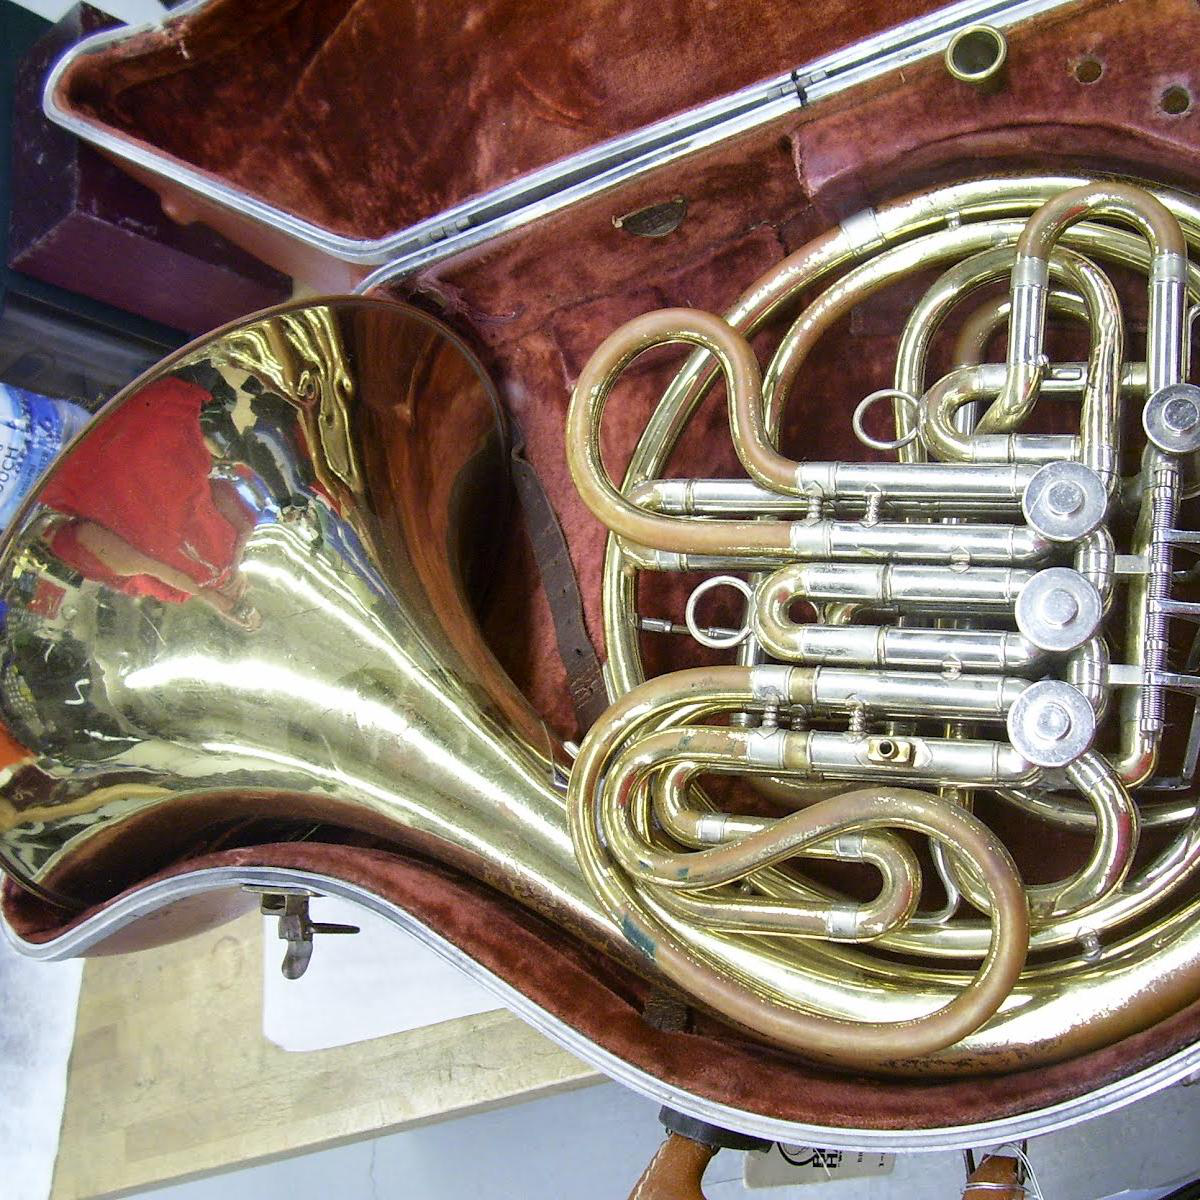

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
from torch.nn import functional as F
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import requests
import pickle
import os
import clip

proxy = 'http://127.0.0.1:7890'
os.environ['http_proxy'] = proxy
os.environ['https_proxy'] = proxy
cuda_device_count = torch.cuda.device_count()
print(cuda_device_count)
device = "cuda:3" if torch.cuda.is_available() else "cpu"
# vlmodel, preprocess = clip.load("ViT-B/32", device=device)
model_type = 'ViT-H-14'

import open_clip
# vlmodel, preprocess_train, feature_extractor = open_clip.create_model_and_transforms(
#     model_type, pretrained='laion2b_s32b_b79k', precision='fp32', device=device)

import json
from omegaconf import OmegaConf
import os

cfg = OmegaConf.load(os.path.join("/mnt/dataset0/ldy/Workspace/FLORA/configs/config.yaml"))
cfg = OmegaConf.structured(cfg)
# Access the paths from the config
img_directory_training = cfg.megdataset.img_directory_training
img_directory_test = cfg.megdataset.img_directory_test
from megdatasets_averaged import MEGDataset


# Instantiate the dataset and dataloader
data_path = "/home/ldy/THINGS-MEG/preprocessed_newsplit"  # Replace with the path to your data
data_path = data_path
train_dataset = MEGDataset(data_path, subjects = ['sub-02'], train=True)    
test_dataset = MEGDataset(data_path, subjects = ['sub-02'], train=False)
# train_dataset = MEGDataset(data_path, exclude_subject = 'sub-01', train=True)    
# test_dataset = MEGDataset(data_path, exclude_subject = 'sub-01', train=False)    
# train_dataset = MEGDataset(data_path, train=True) 
# test_dataset = MEGDataset(data_path, train=False) 
# 训练的eeg数据：torch.Size([16540, 4, 17, 100]) [训练图像数量，训练图像重复数量，通道数，脑电信号时间点]
# 测试的eeg数据：torch.Size([200, 80, 17, 100])
# 1秒 'times': array([-0.2 , -0.19, -0.18, ... , 0.76,  0.77,  0.78, 0.79])}
# 17个通道'ch_names': ['Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2']
# 100 Hz
# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

i = 80*1-1
_, x, label, text, text_features, img,  index, img_index, img_features, _  = test_dataset[i]
print(f"Index {i}, Label: {label}, text: {text}")
Image.open(img)

In [2]:
for i in range(80):
    _, x, label, text, text_features, img,  index, img_index, img_features, _ = train_dataset[i]
    print(f"Index {i}, Label: {label}, text: {text}")
    Image.open(img)


Index 0, Label: 0, text: This picture is 00001_aardvark
Index 1, Label: 0, text: This picture is 00001_aardvark
Index 2, Label: 0, text: This picture is 00001_aardvark
Index 3, Label: 0, text: This picture is 00001_aardvark
Index 4, Label: 0, text: This picture is 00001_aardvark
Index 5, Label: 0, text: This picture is 00001_aardvark
Index 6, Label: 0, text: This picture is 00001_aardvark
Index 7, Label: 0, text: This picture is 00001_aardvark
Index 8, Label: 0, text: This picture is 00001_aardvark
Index 9, Label: 0, text: This picture is 00001_aardvark
Index 10, Label: 0, text: This picture is 00001_aardvark
Index 11, Label: 0, text: This picture is 00001_aardvark
Index 12, Label: 1, text: This picture is 00002_abacus
Index 13, Label: 1, text: This picture is 00002_abacus
Index 14, Label: 1, text: This picture is 00002_abacus
Index 15, Label: 1, text: This picture is 00002_abacus
Index 16, Label: 1, text: This picture is 00002_abacus
Index 17, Label: 1, text: This picture is 00002_aba

In [3]:
for i in range(200):
    _, x, label, text, text_features, img,  index, img_index, img_features, _ = test_dataset[i]
    print(f"Index {i}, Label: {label}, text: {text}")
    Image.open(img)


Index 0, Label: 0, text: This picture is 00001_aircraft_carrier
Index 1, Label: 1, text: This picture is 00002_antelope
Index 2, Label: 2, text: This picture is 00003_backscratcher
Index 3, Label: 3, text: This picture is 00004_balance_beam
Index 4, Label: 4, text: This picture is 00005_banana
Index 5, Label: 5, text: This picture is 00006_baseball_bat
Index 6, Label: 6, text: This picture is 00007_basil
Index 7, Label: 7, text: This picture is 00008_basketball
Index 8, Label: 8, text: This picture is 00009_bassoon
Index 9, Label: 9, text: This picture is 00010_baton4
Index 10, Label: 10, text: This picture is 00011_batter
Index 11, Label: 11, text: This picture is 00012_beaver
Index 12, Label: 12, text: This picture is 00013_bench
Index 13, Label: 13, text: This picture is 00014_bike
Index 14, Label: 14, text: This picture is 00015_birthday_cake
Index 15, Label: 15, text: This picture is 00016_blowtorch
Index 16, Label: 16, text: This picture is 00017_boat
Index 17, Label: 17, text: T